# Load data

In [2]:
import csv
import random
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np

Obtain Titanic passenger data

In [3]:
!wget https://github.com/mlittmancs/great_courses_ml/raw/master/data/ship.csv

--2022-09-03 19:10:16--  https://github.com/mlittmancs/great_courses_ml/raw/master/data/ship.csv
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mlittmancs/great_courses_ml/master/data/ship.csv [following]
--2022-09-03 19:10:17--  https://raw.githubusercontent.com/mlittmancs/great_courses_ml/master/data/ship.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/plain]
Saving to: ‘ship.csv’

ship.csv            100%[===================>]  59.76K  --.-KB/s    in 0.01s   

2022-09-03 19:10:17 (4.07 MB/s) - ‘ship.csv’ saved [61194/61194]



Process csv file, import into Python

In [4]:
first = True
with open("ship.csv") as f:
    csvdata = csv.reader(f, delimiter=',')
    data = []
    for row in csvdata:
      if not first: data += [row]
      first = False

array = []
for col in range(len(data[0])):
  array += [{}]
  new = 0
  for i in range(len(data)):	
     line = data[i]		
     if line[col] not in array[col]:
      array[col][line[col]] = new
      new += 1  
alldat = []
alllabs = []
for line in data:
  alllabs += [int(line[1])]
  if line[5] == '': line[5] = '50'
  alldat += [ [int(line[2]), array[4][line[4]], float(line[5]), int(line[6]), int(line[7]), float(line[9]), line[11]=='S', line[11]=='C', line[11]=='Q' ]]
feats = ['Pclass','Sex','Age','SibSp','Parch','Fare', 'Embarked S', 'Embarked C', 'Embarked Q']

Random sorting of data into testing and training data

In [5]:
trainmask = [random.randint(0,2) for i in range(len(alldat))]

traindat = [alldat[i] for i in range(len(alldat)) if trainmask[i]<2]
trainlabs = [alllabs[i] for i in range(len(alldat)) if trainmask[i]<2]
testdat = [alldat[i] for i in range(len(alldat)) if trainmask[i]==2]
testlabs = [alllabs[i] for i in range(len(alldat)) if trainmask[i]==2]

In [6]:
# load test data into df
testdat = pd.DataFrame(testdat, columns = feats)
testdat['log_Fare'] = np.where(testdat['Fare']>0, np.log(testdat['Fare']), 0)
testdat

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked S,Embarked C,Embarked Q,log_Fare
0,3,1,26.0,0,0,7.9250,True,False,False,2.070022
1,3,0,50.0,0,0,8.4583,False,False,True,2.135148
2,1,1,58.0,0,0,26.5500,True,False,False,3.279030
3,3,0,39.0,1,5,31.2750,True,False,False,3.442819
4,2,0,50.0,0,0,13.0000,True,False,False,2.564949
...,...,...,...,...,...,...,...,...,...,...
297,3,0,25.0,0,0,7.0500,True,False,False,1.953028
298,3,1,39.0,0,5,29.1250,False,False,True,3.371597
299,2,0,27.0,0,0,13.0000,True,False,False,2.564949
300,1,1,19.0,0,0,30.0000,True,False,False,3.401197


# Review data

Review the data relationships and make initial observations on trends and potential correlations. 

In [7]:
traindat_df = pd.DataFrame(traindat, columns = feats) # convert list to pd dataframe
trainlabs_df = pd.DataFrame(trainlabs, columns = ['Survived'])
traincombined_df = traindat_df.join(trainlabs_df) # combine into one dataframe for initial review
traincombined_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked S,Embarked C,Embarked Q,Survived
0,3,0,22.0,1,0,7.2500,True,False,False,0
1,1,1,38.0,1,0,71.2833,False,True,False,1
2,1,1,35.0,1,0,53.1000,True,False,False,1
3,3,0,35.0,0,0,8.0500,True,False,False,0
4,1,0,54.0,0,0,51.8625,True,False,False,0
...,...,...,...,...,...,...,...,...,...,...
584,2,1,25.0,0,1,26.0000,True,False,False,1
585,3,0,33.0,0,0,7.8958,True,False,False,0
586,2,0,28.0,0,0,10.5000,True,False,False,0
587,1,0,26.0,0,0,30.0000,False,True,False,1


In [8]:
traincombined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589 entries, 0 to 588
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      589 non-null    int64  
 1   Sex         589 non-null    int64  
 2   Age         589 non-null    float64
 3   SibSp       589 non-null    int64  
 4   Parch       589 non-null    int64  
 5   Fare        589 non-null    float64
 6   Embarked S  589 non-null    bool   
 7   Embarked C  589 non-null    bool   
 8   Embarked Q  589 non-null    bool   
 9   Survived    589 non-null    int64  
dtypes: bool(3), float64(2), int64(5)
memory usage: 34.1 KB


In [9]:
# summary/descriptive statistics
traincombined_df.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
count,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000
mean,2.329372,0.363328,33.540747,0.512733,0.380306,32.640768,0.388795
std,0.837170,0.481367,15.078691,1.104378,0.796262,51.362766,0.487891
min,1.000000,0.000000,0.670000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.925000,0.000000
50%,3.000000,0.000000,32.000000,0.000000,0.000000,14.458300,0.000000
75%,3.000000,1.000000,50.000000,1.000000,0.000000,31.275000,1.000000
max,3.000000,1.000000,80.000000,8.000000,5.000000,512.329200,1.000000


It's important to visualize the data to observe trends. Here, we start with a standard histogram of each of the attributes to better understand the data. Is it numerical or categorical? Is it discrete or continuous? Is the data normally distributed or not?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efd5b51d610>,
      dtype=object)

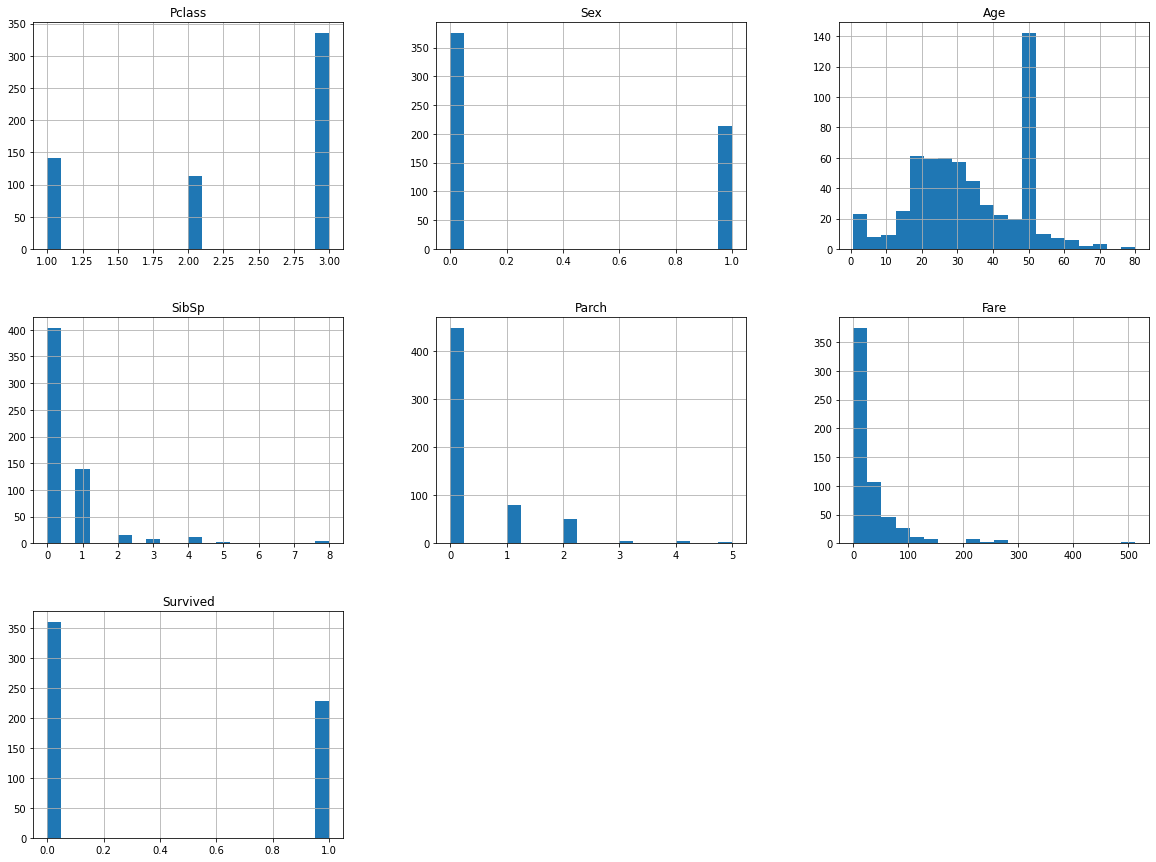

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

traincombined_df.hist(bins=20, figsize = (20,15))

It looks like age is the only candidate for normal distribution, although there are some strange things happening toward the tail end of the data. Fare, Parch, SibSp look skewed. Remaining look like categorical data that has been converted to numbers.

Next, let's look at a linear correlation matrix to see if there are clear linear trends between the attributes.

In [11]:
# look for correlations. function only comes back with if there is linear correlation.
pd.options.display.max_columns = 10 # print all columns of matrix.
corr_matrix = traincombined_df.corr()
print(corr_matrix)

              Pclass       Sex       Age     SibSp     Parch      Fare  \
Pclass      1.000000 -0.115995 -0.151979  0.067195 -0.012193 -0.558554   
Sex        -0.115995  1.000000 -0.106133  0.125645  0.246763  0.179920   
Age        -0.151979 -0.106133  1.000000 -0.131528 -0.186601  0.023047   
SibSp       0.067195  0.125645 -0.131528  1.000000  0.394815  0.167832   
Parch      -0.012193  0.246763 -0.186601  0.394815  1.000000  0.226164   
Fare       -0.558554  0.179920  0.023047  0.167832  0.226164  1.000000   
Embarked S  0.065801 -0.121726 -0.155801  0.063446  0.081485 -0.136866   
Embarked C -0.222449  0.080498  0.058968 -0.067282 -0.020666  0.232205   
Embarked Q  0.222343  0.073884  0.156659 -0.003515 -0.099652 -0.116963   
Survived   -0.355695  0.512678 -0.114391 -0.023407  0.082782  0.261940   

            Embarked S  Embarked C  Embarked Q  Survived  
Pclass        0.065801   -0.222449    0.222343 -0.355695  
Sex          -0.121726    0.080498    0.073884  0.512678  
Age     

In [12]:
corr_matrix['Survived'].sort_values(ascending=False)

Survived      1.000000
Sex           0.512678
Fare          0.261940
Embarked C    0.157691
Parch         0.082782
Embarked Q   -0.017991
SibSp        -0.023407
Age          -0.114391
Embarked S   -0.133158
Pclass       -0.355695
Name: Survived, dtype: float64

Question about the data, why are there so many 50 year olds? Is this an estimate age or were there truly that many 50 year olds present on the titanic? 

Maybe we should consider editing or adjust that to see if the otherwise normal distribution on age as an imapct?

We also have a skewed distribution for fare (which is a smoother function for class). We should perform a log transformation on that to get more normally distributed data and reassess if the log of the attribute brings out any linear correlations.

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Pclass       -0.355695
Sex           0.512678
Age          -0.114391
SibSp        -0.023407
Parch         0.082782
Fare          0.261940
Embarked S   -0.133158
Embarked C    0.157691
Embarked Q   -0.017991
Survived      1.000000
log_Fare      0.350690
Name: Survived, dtype: float64

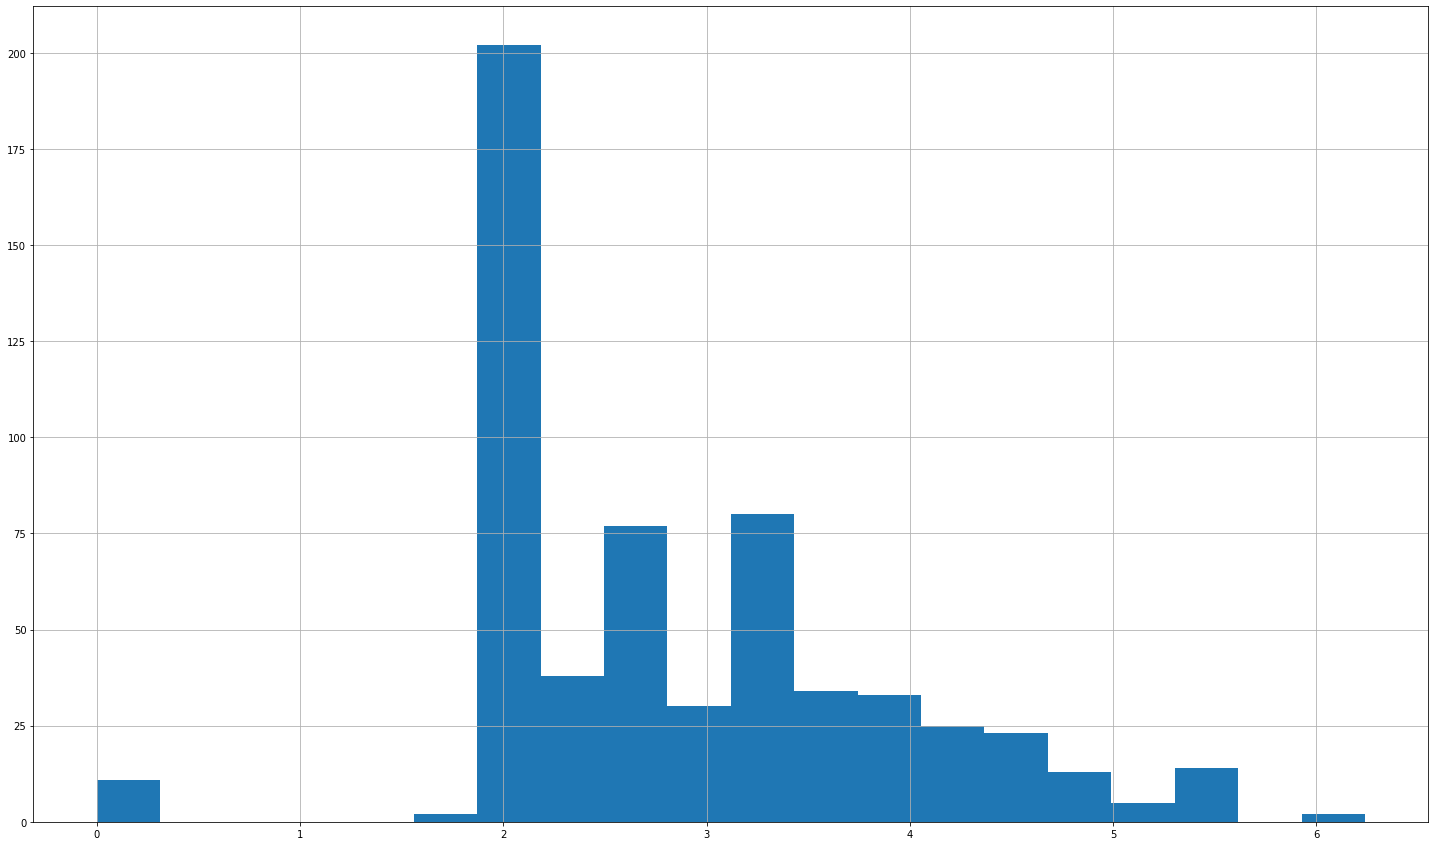

In [13]:
# log transofrmation for fare
import numpy as np

traincombined_df['log_Fare'] = np.where(traincombined_df['Fare']>0, 
                                        np.log(traincombined_df['Fare']), 0)  #ignore 0 values 
traincombined_df['log_Fare'].hist(bins=20, figsize = (25,15))

corr_matrix = traincombined_df.corr()
corr_matrix['Survived']

In [14]:
# drop labels
traindat_df = traincombined_df.drop(columns=["Survived"])
feats = ['Pclass','Sex','Age','SibSp','Parch','Fare', 'Embarked S', 'Embarked C', 'Embarked Q','log_Fare']

# Decision Tree

We'll start with a simple ML decision tree to see if any clear classifications can sort the bulk of the data. 

accuracy of decision tree for training data is: 0.7775891341256367
accuracy of decision tree for testing data is: 0.804635761589404


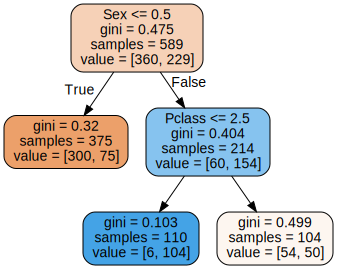

In [15]:
from sklearn import tree
import graphviz 

clf = tree.DecisionTreeClassifier(max_leaf_nodes = 3)	
clf = clf.fit(traindat_df, trainlabs_df)

score_train = clf.score(traindat_df,trainlabs_df) # accuracy
score_test = clf.score(testdat, testlabs)
print("accuracy of decision tree for training data is:", score_train)
print("accuracy of decision tree for testing data is:", score_test)

dot_data = tree.export_graphviz(clf, feature_names=feats,
                      filled=True, rounded=True) 
graph = graphviz.Source(dot_data)	
graph	

Looks like Sex and Pclass are the most important attributes in determining survival of the passenger. ~78% of the classification can be defined by these two attribtues. We can increase the max node leaves, but it doesn't add a lot of value. This just leads to overfitting. 

# MLP Model

Let's try a simple multilayer perceptron NN and display the accuracy.

In [16]:
nhidden = 60
clf = MLPClassifier(hidden_layer_sizes=[nhidden], max_iter = 50000)
clf = clf.fit(traindat_df, trainlabs_df)
pred = clf.predict(testdat)
[sum([pred[i] != testlabs[i] for i in range(len(testlabs))]) / len(testlabs)]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.17549668874172186]

# Logistic regression

Next, let's try logistic regression.

Logistic regression is a one-layer neural network equivalent to signmoid activation. Basically multivariate model. 

In [17]:
clf = LogisticRegression(max_iter = 50000)

clf.fit(traindat_df, trainlabs_df)  

print("accuracy of MLP for training data is:", score_train)
print("accuracy of MLP for testing data is:", score_test)

accuracy of MLP for training data is: 0.7775891341256367
accuracy of MLP for testing data is: 0.804635761589404


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Then print the coefficients of the logistic regression model. Again, we're seeing that the attributes Sex and Pclass are the best at determining the survival of the passenger. The entire logistic regression analysis does not perform significantly better than the three node decision tree.

In [18]:
for i in range(len(feats)):
  print(feats[i], clf.coef_[0][i])


Pclass -0.7386515129825114
Sex 2.3438605361219795
Age -0.027059882877413056
SibSp -0.31460627274022623
Parch -0.203422984758532
Fare -0.0036131392532260656
Embarked S -0.27232766783510787
Embarked C 0.0547001754372503
Embarked Q 0.20151538666693572
log_Fare 0.5833369341073777


# Naive Bayes

We'll try a Naive Bayes classifier just for fun.

In [19]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(traindat_df, trainlabs_df)
score = clf.score(traindat_df, trainlabs_df)
score

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6977928692699491

Wrapping up: I like the decision tree best as a predictive model for classifying the survival of a passenger on the titanic. It retains the best parsimony: explaining as much of the data with as few variables/attributes as possible. With a simple decision tree, it would also be far less computationally demanding than other models. 